In [3]:
!pip install scikit-learn


   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 725.5 kB/s eta 0:00:12
   -- ------------------------------------- 0.5/8.7 MB 725.5 kB/s eta 0:00:12
   -- ------------------------------------- 0.5/8.7 MB 725.5 kB/s eta 0:00:12
   -- ------------------------------------- 0.5/8.7 MB 725.5 kB/s eta 0:00:12
   --- ------------------------------------ 0.8/8.7 MB 422.0 kB/s eta 0:00:19
   --- ------------------------------------ 0.8/8.7 MB 422.0 kB/s eta 0:00:19
   --- ------------------------------------ 0.8/8


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


First 5 rows of synthetic dataset:
   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0  37.454012  95.071431  73.199394  59.865848  15.601864  15.599452   
1   2.058449  96.990985  83.244264  21.233911  18.182497  18.340451   
2  61.185289  13.949386  29.214465  36.636184  45.606998  78.517596   
3  60.754485  17.052412   6.505159  94.888554  96.563203  80.839735   
4  12.203823  49.517691   3.438852  90.932040  25.877998  66.252228   

   feature_7  feature_8  feature_9  feature_10  priority priority_label  
0   5.808361  86.617615  60.111501   70.807258         1         Medium  
1  30.424224  52.475643  43.194502   29.122914         1         Medium  
2  19.967378  51.423444  59.241457    4.645041         2           High  
3  30.461377   9.767211  68.423303   44.015249         1         Medium  
4  31.171108  52.006802  54.671028   18.485446         2           High  

Accuracy: 0.41
F1-score: 0.37

Classification Report:
              precision    recall  f1-s

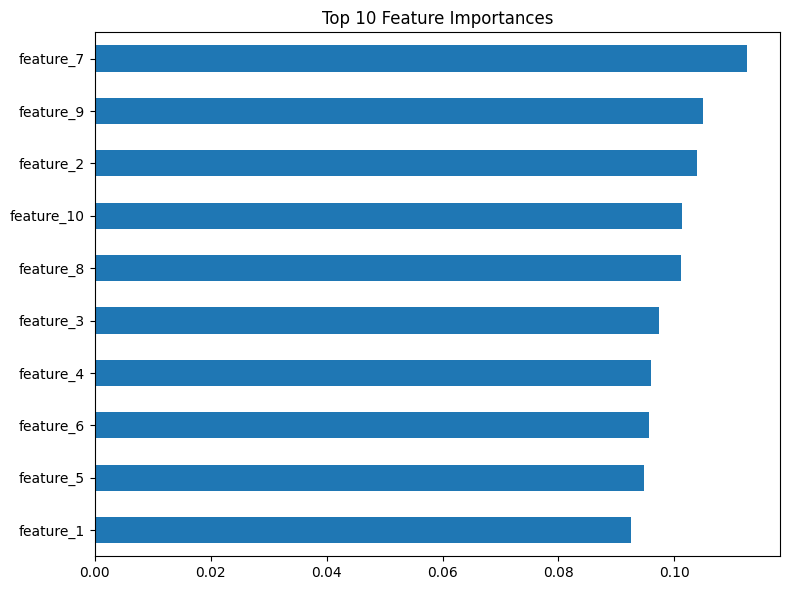

In [5]:
# ====================================
# Synthetic Issue Priority Dataset
# Predicting High / Medium / Low using Random Forest
# ====================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

#  Creating synthetic dataset
np.random.seed(42)

n_samples = 500  # number of rows
n_features = 10  # number of features

# Generate random numeric features
X_data = np.random.rand(n_samples, n_features) * 100

# Generate random priority labels: 0 = Low, 1 = Medium, 2 = High
y_data = np.random.choice([0, 1, 2], size=n_samples, p=[0.3, 0.4, 0.3])

# Create column names
feature_names = [f'feature_{i+1}' for i in range(n_features)]

# Build DataFrame
data = pd.DataFrame(X_data, columns=feature_names)
data['priority'] = y_data

# Optional: map numeric labels to strings for clarity
priority_map = {0: 'Low', 1: 'Medium', 2: 'High'}
data['priority_label'] = data['priority'].map(priority_map)

print("First 5 rows of synthetic dataset:")
print(data.head())

# 2️⃣ Encode target labels
le = LabelEncoder()
data['priority_encoded'] = le.fit_transform(data['priority_label'])

# 3️⃣ Features and target
X = data.drop(columns=['priority', 'priority_label', 'priority_encoded'])
y = data['priority_encoded']

# 4️⃣ Split data into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5️⃣ Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 6️⃣ Evaluate model
y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # weighted for multi-class

print(f"\nAccuracy: {acc:.2f}")
print(f"F1-score: {f1:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# 7️⃣ Feature Importance
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.sort_values().tail(10).plot(
    kind='barh', figsize=(8,6), title='Top 10 Feature Importances'
)
plt.tight_layout()
plt.show()
